In [2]:
from numpy import *
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qutip import *

### excited-state population

In [252]:
def prob_function(t,W,D):
    W_eff = np.sqrt(W**2+D**2)
    return W**2/W_eff**2*(0.5-0.5*np.cos(W_eff*t))

In [260]:
Omega=1
Delta=1

### defining Hamiltonian

In [261]:
H = 0.5*2*np.pi*Omega*sigmax() # in MHz
HD = 0.5*2*np.pi*Omega*sigmax() + 0.5*2*np.pi*Delta*sigmaz() # in MHz

### defining initial states and observables

In [267]:
ψ0 = basis(2,0) #generates a basis vector of dimention 2 and the 1 value at position 0.
times = np.linspace(0.0,5,500)
ψ1 = basis(2,1)
excitation = ψ1*ψ1.dag() #observable for the excited state population i.e. \rho_{ee} = \ket{e}\bra{e}

### unitary evolution, Lindblad master equation solver

In [268]:
result = mesolve(H,ψ0,times,[],[excitation])
resultD = mesolve(HD,ψ0,times,[],[excitation])

### using prob_function formula

In [269]:
model = prob_function(times,2*np.pi*Omega,0)
modelD = prob_function(times,2*np.pi*Omega,2*np.pi*Delta)

In [270]:
shape(modelD)

(500,)

### plotting together 

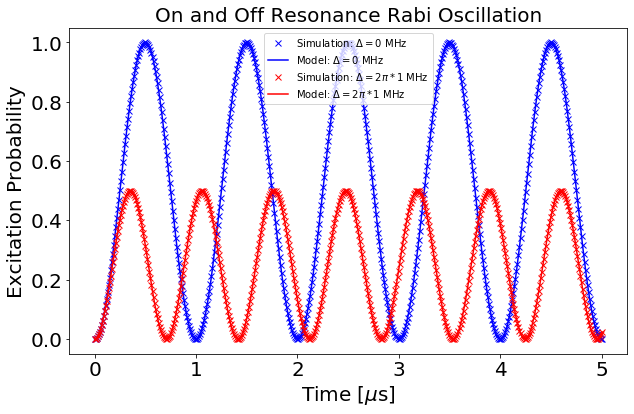

In [271]:
plt.figure(num=1,  figsize=(10,6))
plt.plot(result.times,result.expect[0],'bx',label=r'Simulation: $\Delta = 0$ MHz')
plt.plot(times,model,'b',label=r'Model: $\Delta = 0$ MHz')
plt.plot(resultD.times,resultD.expect[0],'rx',label=r'Simulation: $\Delta = 2\pi * 1$ MHz')
plt.plot(times,modelD,'r',label=r'Model: $\Delta = 2\pi * 1$ MHz')
plt.title('On and Off Resonance Rabi Oscillation',fontsize=20)
plt.xlabel(r'Time [$\mu$s]',fontsize=20)
plt.ylabel('Excitation Probability',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=10)
plt.show()

# Implement VAET compare to Rabi oscillations

In [302]:
fockstate_dim = 10
dt=0.01 # in ms
# freq_noise = np.linspace(0,1/dt,n)

In [303]:
J = 12.0
kappa = 5.0
Delta = 32.0
nu_eff = np.sqrt(J**2 + Delta**2)

In [304]:
H = 0.5*2*np.pi*J*sigmax()
HD = 0.5*2*np.pi*J*sigmax() + 0.5*2*np.pi*Delta*sigmaz()

In [305]:
ψ0 = basis(2,0) #generates a basis vector of dimension 2 and the 1 value at position 0.
times = np.linspace(0.0,0.6,500)
ψ1 = basis(2,1) #generates a basis vector of dimention 2 and the 1 value at position 1.
excitation = ψ1*ψ1.dag()

In [306]:
result = mesolve(H, ψ0, times, [], [excitation])
resultD = mesolve(HD, ψ0, times, [], [excitation])

In [307]:
identity_sb = qeye(2)
identity_vb = qeye(fockstate_dim)
initial_V = tensor([ψ0*ψ0.dag(),basis(fockstate_dim,0)*basis(fockstate_dim,0).dag()])

In [308]:
a_op = destroy(fockstate_dim)
num_op = num(fockstate_dim)

In [309]:
c_ops = []
exc_ops = [tensor([ψ1*ψ1.dag(),identity_vb])]#basis(fockstate_dim,0)*basis(fockstate_dim,0).dag()])]
t = times
HV = 2*np.pi* J/2 * tensor([sigmax(),identity_vb]) + 2*np.pi* Delta/2 * tensor([sigmaz(),identity_vb]) + 2*np.pi* kappa/2 * tensor([sigmaz(),a_op + a_op.dag()]) + 2*np.pi* nu_eff * tensor([identity_sb,num_op])
output = mesolve(HV,initial_V,t,c_ops,exc_ops)

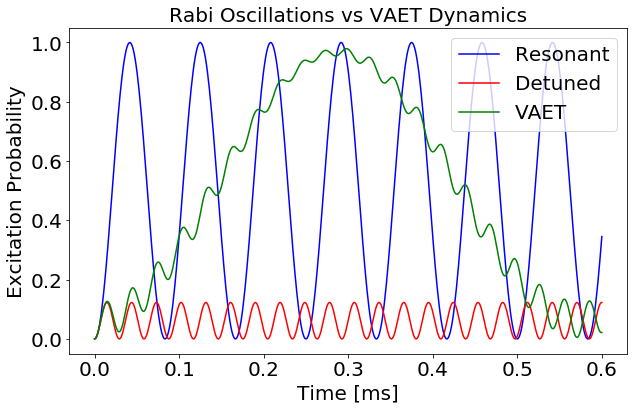

In [310]:
plt.figure(num=2, figsize=(10,6))
plt.plot(result.times,result.expect[0],'b',label=r'Resonant')
plt.plot(resultD.times,resultD.expect[0],'r',label=r'Detuned')
plt.plot(t,output.expect[0],'g',label=r'VAET')
plt.title('Rabi Oscillations vs VAET Dynamics',fontsize=20)
plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Excitation Probability',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc= 'upper right',fontsize=20)
plt.show()

# Implement VEAT with various values of kappa

In [312]:
J = 12.0
kappa1 = 5
kappa2 = 10
kappa3 = 15
Delta = 34.0
nu_eff = np.sqrt(J**2+Delta**2)



In [313]:
HV1 = 2*np.pi* J/2 * tensor([sigmax(),identity_vb]) + 2*np.pi* Delta/2 * tensor([sigmaz(),identity_vb]) + 2*np.pi* kappa1/2 * tensor([sigmaz(),a_op + a_op.dag()]) + 2*np.pi* nu_eff * tensor([identity_sb,num_op])
HV2 = 2*np.pi* J/2 * tensor([sigmax(),identity_vb]) + 2*np.pi* Delta/2 * tensor([sigmaz(),identity_vb]) + 2*np.pi* kappa2/2 * tensor([sigmaz(),a_op + a_op.dag()]) + 2*np.pi* nu_eff * tensor([identity_sb,num_op])
HV3 = 2*np.pi* J/2 * tensor([sigmax(),identity_vb]) + 2*np.pi* Delta/2 * tensor([sigmaz(),identity_vb]) + 2*np.pi* kappa3/2 * tensor([sigmaz(),a_op + a_op.dag()]) + 2*np.pi* nu_eff * tensor([identity_sb,num_op])

In [314]:
output1 = mesolve(HV1,initial_V,t,c_ops,exc_ops)
output2 = mesolve(HV2,initial_V,t,c_ops,exc_ops)
output3 = mesolve(HV3,initial_V,t,c_ops,exc_ops)

Text(0.5, 0, 'Time [ms]')

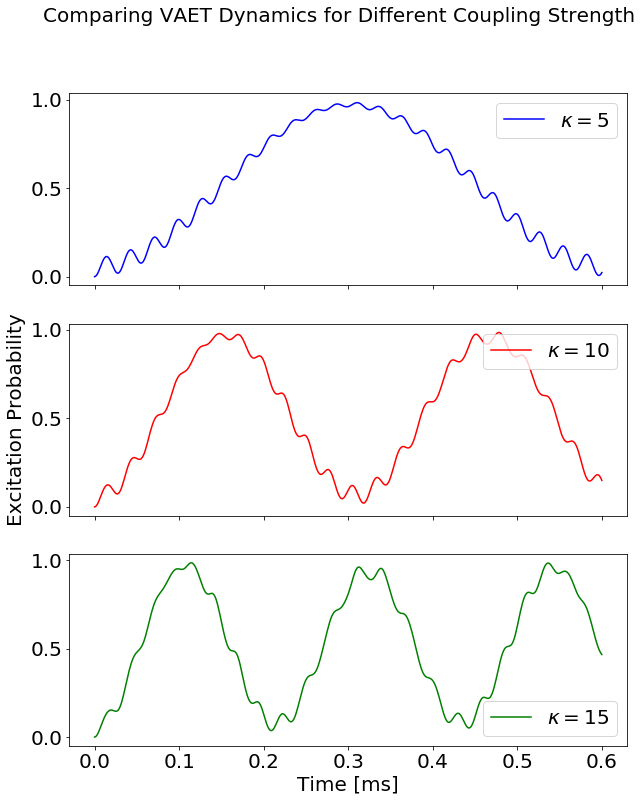

In [327]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(10,12))
fig.suptitle('Comparing VAET Dynamics for Different Coupling Strength',fontsize=20)
ax1.plot(times,output1.expect[0],'b',label=r'$\kappa = 5$')
ax1.legend(loc= 'upper right',fontsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax2.plot(times,output2.expect[0],'r',label=r'$\kappa = 10$')
ax2.legend(loc= 'upper right',fontsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax3.plot(times,output3.expect[0],'g',label=r'$\kappa = 15$')
ax3.legend(loc= 'lower right',fontsize=20)
ax2.set_ylabel('Excitation Probability',fontsize=20)
ax3.yaxis.set_tick_params(labelsize=20)
ax3.xaxis.set_tick_params(labelsize=20)
ax3.set_xlabel('Time [ms]',fontsize=20)

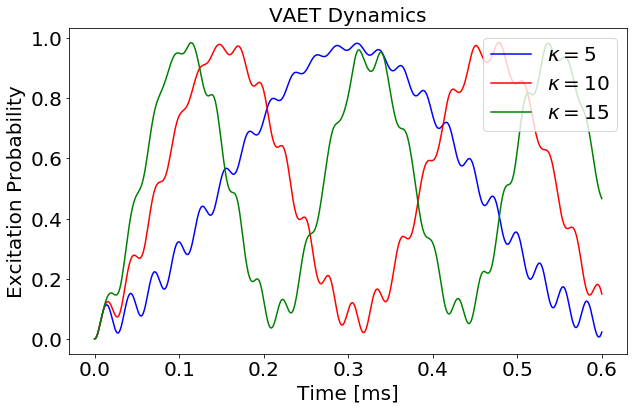

In [322]:
plt.figure(num=3, figsize=(10,6))
plt.plot(times,output1.expect[0],'b',label=r'$\kappa = 5$')
plt.plot(times,output2.expect[0],'r',label=r'$\kappa = 10$')
plt.plot(times,output3.expect[0],'g',label=r'$\kappa = 15$')
plt.title('VAET Dynamics',fontsize=20)
plt.xlabel('Time [ms]',fontsize=20)
plt.ylabel('Excitation Probability',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc= 'upper right',fontsize=20)
plt.show()

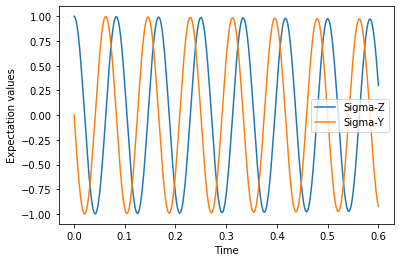

In [325]:
# we add a relaxation process (dissipation of energy from the spn to its environment)
# this can easily be done by adding a collapse operator in qu.mesolve. 

result = mesolve(H,psi0,times,np.sqrt(0.05)*sigmaz(),[sigmaz(),sigmay()])

fig, ax = plt.subplots()

ax.plot(result.times,result.expect[0])
ax.plot(result.times,result.expect[1])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("Sigma-Z","Sigma-Y"))
plt.show()

In [6]:
basis(2,0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [29]:
tensor(basis(5,0), basis(2,1))

Quantum object: dims = [[5, 2], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [6]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())


In [7]:
c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)


In [8]:
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])


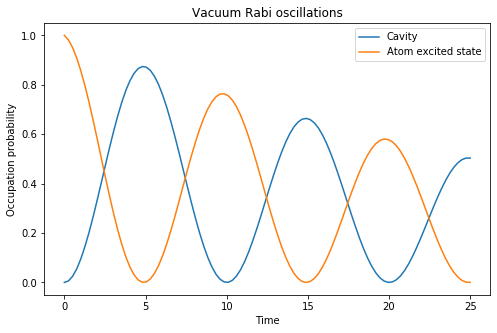

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');

In [10]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.5.2
Numpy,1.16.5
SciPy,1.3.1
matplotlib,3.1.1
Cython,0.29.13
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,7.8.0
Python,"3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]"
OS,nt [win32]
